# What is filter method?
Features selected using filter methods can be used as an input to any machine learning models.

Univariate -> Fisher Score, Mutual Information Gain, Variance etc<br>
Multi-variate -> Pearson Correlation<br>

The <b>univariate filter</b> methods are the type of methods where individual features are ranked according
to specific criteria. The top N features are then selected. 
Different types of ranking criteria are used for univariate filtermethods, for example fisher score, 
mutual information, and variance of the feature.<br>

<b>Multivariate filter</b>  methods are capable of removing redundant features from the 
data since they take the mutual relationship between the features into account.

In [ ]:
pip install numpy --upgrade --ignore-installed

In [ ]:
pip install sklearn --upgrade --ignore-installed

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import VarianceThreshold

In [3]:
data = pd.read_csv('./Data-Files-for-Feature-Selection-master/santander-train.csv', nrows = 20000)
data.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [4]:
X = data.drop('TARGET', axis = 1)
y = data['TARGET']
X.shape, y.shape

((20000, 370), (20000,))

Let’s split this dataset into train and test datasets using the below code.

Here test_size = 0.2 that means 20% for testing and remaining for training the model.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

## Constant Features Removal

In [6]:
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(X_train)

VarianceThreshold(threshold=0)

In [7]:
# Let’s get the number of features left after removing constant features.
constant_filter.get_support().sum()

291

In [9]:
# Let’s print the constant features list.
constant_list = [not temp for temp in constant_filter.get_support()]
#constant_list

In [10]:
#Now we will try get the name of features which are constant.
X.columns[constant_list]

Index(['ind_var2_0', 'ind_var2', 'ind_var13_medio_0', 'ind_var13_medio',
       'ind_var18_0', 'ind_var18', 'ind_var27_0', 'ind_var28_0', 'ind_var28',
       'ind_var27', 'ind_var34_0', 'ind_var34', 'ind_var41', 'ind_var46_0',
       'ind_var46', 'num_var13_medio_0', 'num_var13_medio', 'num_var18_0',
       'num_var18', 'num_var27_0', 'num_var28_0', 'num_var28', 'num_var27',
       'num_var34_0', 'num_var34', 'num_var41', 'num_var46_0', 'num_var46',
       'saldo_var13_medio', 'saldo_var18', 'saldo_var28', 'saldo_var27',
       'saldo_var34', 'saldo_var41', 'saldo_var46',
       'delta_imp_amort_var18_1y3', 'delta_imp_amort_var34_1y3',
       'delta_imp_reemb_var33_1y3', 'delta_imp_trasp_var17_out_1y3',
       'delta_imp_trasp_var33_out_1y3', 'delta_num_reemb_var33_1y3',
       'delta_num_trasp_var17_out_1y3', 'delta_num_trasp_var33_out_1y3',
       'imp_amort_var18_hace3', 'imp_amort_var18_ult1',
       'imp_amort_var34_hace3', 'imp_amort_var34_ult1', 'imp_var7_emit_ult1',
       'imp

In [11]:
#Let’s go ahead and transform the x_train and x_test datasets into non constant datasets.
X_train_filter = constant_filter.transform(X_train)
X_test_filter = constant_filter.transform(X_test)

In [12]:
#Let’s get the shape of the datasets.
X_train_filter.shape, X_test_filter.shape, X_train.shape

((16000, 291), (4000, 291), (16000, 370))

- In this way, we have reduced features from 370 to 291 features.

## Quasi constant feature removal

These are the filters that are almost constant or quasi constant in other words 
these features have same values for large subset of outputs and 
such features are not very useful for making predictions.

There is no rule for fixing threshold value but generally we can take as 99% similarity and 1% of non similarity.

In [13]:
#Let’s go ahead see how many quasi constant features are there.
quasi_constant_filter = VarianceThreshold(threshold=0.01)
quasi_constant_filter.fit(X_train_filter)
VarianceThreshold(threshold=0.01)

VarianceThreshold(threshold=0.01)

In [14]:
#let’s see how many features are non quasi constant.
quasi_constant_filter.get_support().sum()

245

In [15]:
#To remove those quasi constant features, we need to apply transform on quasi transform filter object.
X_train_quasi_filter = quasi_constant_filter.transform(X_train_filter)
X_test_quasi_filter = quasi_constant_filter.transform(X_test_filter)
X_train_quasi_filter.shape, X_test_quasi_filter.shape


((16000, 245), (4000, 245))

- In this way, we have reduced features from 370 to 245 features.

## Remove Duplicate Features

If two features are exactly same those are called as duplicate features 
that means these features doesn’t provide any new information and makes our model complex.

Here we have a problem as we did in quasi constant and constant 
removal sklearn doesn’t have direct library to handle with duplicate features .

So, first we will do transpose the dataset and then python have a method to remove duplicate features.

In [33]:
#Let’s transpose the training and testing dataset by using following code.
X_train_T = X_train_quasi_filter.T
X_test_T = X_test_quasi_filter.T
type(X_train_T)

numpy.ndarray

In [38]:
#X_train_T

In [39]:
#Let’s change into pandas dataframe.
X_train_T = pd.DataFrame(X_train_T)
X_test_T = pd.DataFrame(X_test_T)

In [40]:
X_train_T.head()

,0,1,2,3,4,5,6,7,8,9,...,15990,15991,15992,15993,15994,15995,15996,15997,15998,15999
0,17282.0,38270.0,31526.0,38737.0,16469.0,4464.0,302.00,22890.00,12211.0,11949.0,...,31516.0,1337.0,37006.0,19809.0,10783.00,38333.0,26389.0,2025.0,17327.0,25406.0
1,2.0,2.0,2.0,2.0,2.0,2.0,2.00,2.00,2.0,2.0,...,2.0,2.0,2.0,2.0,2.00,2.0,2.0,2.0,2.0,2.0
2,24.0,23.0,45.0,29.0,23.0,23.0,31.00,31.00,24.0,28.0,...,26.0,36.0,23.0,44.0,23.00,25.0,34.0,43.0,23.0,23.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,97.59,1005.54,0.0,0.0,...,0.0,0.0,0.0,0.0,53.85,0.0,0.0,0.0,0.0,0.0


In [41]:
#Let’s check the shapes of the datasets
X_train_T.shape, X_test_T.shape

((245, 16000), (245, 4000))

In [42]:
#Let’s go ahead and get the duplicate features.
X_train_T.duplicated().sum()

18

In [43]:
duplicated_features = X_train_T.duplicated()
#duplicated_features

In [44]:
#Now, we need to get to non duplicated features from the following code.
features_to_keep = [not index for index in duplicated_features]

In [45]:
#Let’s do transpose again to get the original shape.
X_train_unique = X_train_T[features_to_keep].T
X_test_unique = X_test_T[features_to_keep].T

In [46]:
#Let’s check the shape of the datasets.
X_train_unique.shape, X_train.shape

((16000, 227), (16000, 370))

Here, we can observe original dataset has 370 features and after removal of quasi constant, 
constant and duplicate features we have 227 features.

## Build ML model and compare the performance of the selected feature

In [28]:
def run_randomForest(X_train, X_test, y_train, y_test):
    clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('Accuracy on test set: ')
    print(accuracy_score(y_test, y_pred))

In [29]:
%%time
run_randomForest(X_train_unique, X_test_unique, y_train, y_test)

Accuracy on test set: 
0.95875
CPU times: user 5.67 s, sys: 184 ms, total: 5.85 s
Wall time: 3.39 s


In [32]:
%%time
run_randomForest(X_train, X_test, y_train, y_test)

#Let’s check the accuracy of the original dataset.


Accuracy on test set: 
0.9585
CPU times: user 6.2 s, sys: 242 ms, total: 6.45 s
Wall time: 3.75 s


## Correlated Feature Removal

- A dataset can also contain correlated features. 
- Two or more than two features are correlated if they are close to each other in the linear space.
- Correlation between the output observations and the input features is very important and such features should be retained.

### Summary

- Feature Space to target correlation is desired
- Feature to feature correlation is not desired
- If 2 features are highly correlated then either feature is redundant
- Correlation in feature space increases model complexity
- Removing correlated features improves model performance
- Different model shows different performance over the correlated features

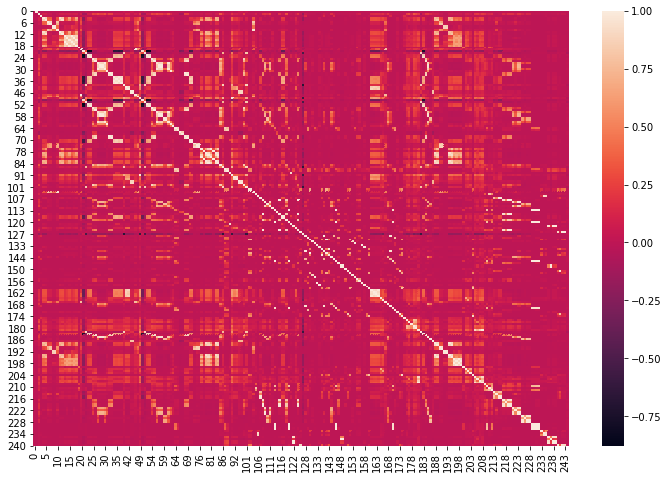

In [47]:
corrmat = X_train_unique.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corrmat)

In [48]:
def get_correlation(data, threshold):
    corr_col = set()
    corrmat = data.corr()
    for i in range(len(corrmat.columns)):
        for j in range(i):
            if abs(corrmat.iloc[i, j])> threshold:
                colname = corrmat.columns[i]
                corr_col.add(colname)
    return corr_col

In [50]:
corr_features = get_correlation(X_train_unique, 0.85)
#corr_features

In [51]:
len(corr_features)

124

In [77]:
X_train_unique.head()

,0,1,2,3,4,5,6,7,8,9,...,235,236,237,238,239,240,241,242,243,244
0,17282.0,2.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,63200.700000
1,38270.0,2.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,88640.610000
2,31526.0,2.0,45.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,96314.160000
3,38737.0,2.0,29.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117568.020000
4,16469.0,2.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016


In [52]:
#Let’s drop the correlated features from the dataset.
X_train_uncorr = X_train_unique.drop(labels=corr_features, axis = 1)
X_test_uncorr = X_test_unique.drop(labels = corr_features, axis = 1)
X_train_uncorr.shape, X_test_uncorr.shape

((16000, 103), (4000, 103))

In [ ]:
#Let’s find out the accuracy and training time of the uncorrelated dataset.

In [53]:
%%time
run_randomForest(X_train_uncorr, X_test_uncorr, y_train, y_test)

Accuracy on test set: 
0.95875
CPU times: user 3.98 s, sys: 129 ms, total: 4.11 s
Wall time: 2.51 s


In [ ]:
#Now we will find out the accuracy and training time of the original daatset.

In [54]:
%%time
run_randomForest(X_train, X_test, y_train, y_test)

Accuracy on test set: 
0.9585
CPU times: user 5.99 s, sys: 193 ms, total: 6.19 s
Wall time: 3.95 s


In [55]:
# Feature Grouping and Feature Importance
corrmat

,0,1,2,3,4,5,6,7,8,9,...,235,236,237,238,239,240,241,242,243,244
0,1.000000,-0.025277,-0.001942,0.003594,0.004054,-0.001697,-0.015882,-0.019807,0.000956,-0.000588,...,-0.001337,0.002051,-0.008500,0.006554,0.005907,0.008825,-0.009174,0.012031,0.012128,0.006612
1,-0.025277,1.000000,-0.007647,0.001819,0.008981,0.009232,0.001638,0.001746,0.000614,0.000695,...,0.000544,0.000586,0.000337,0.000550,0.000563,0.000922,0.000598,0.000875,0.000942,0.000415
2,-0.001942,-0.007647,1.000000,0.030919,0.106245,0.109140,0.048524,0.055708,0.004040,0.005796,...,0.025522,0.020168,0.011550,0.019325,0.019527,0.041321,0.016172,0.043577,0.044281,-0.000810
3,0.003594,0.001819,0.030919,1.000000,0.029418,0.024905,0.014513,0.013857,-0.000613,-0.000691,...,0.014032,-0.000583,-0.000337,-0.000548,-0.000561,0.000541,-0.000577,0.000231,0.000235,0.000966
4,0.004054,0.008981,0.106245,0.029418,1.000000,0.888789,0.381632,0.341266,0.012927,0.019674,...,0.002328,0.016743,-0.001662,0.020509,0.021276,-0.001905,-0.000635,-0.002552,-0.002736,0.003656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,0.008825,0.000922,0.041321,0.000541,-0.001905,0.000871,-0.000818,-0.000866,-0.000309,-0.000349,...,0.012705,0.021540,-0.000170,0.032162,0.030087,1.000000,0.329805,0.935317,0.919036,0.011106
241,-0.009174,0.000598,0.016172,-0.000577,-0.000635,0.007096,-0.000515,-0.000545,-0.000195,-0.000220,...,-0.000173,-0.000185,-0.000107,-0.000174,-0.000178,0.329805,1.000000,0.127224,0.140902,0.011807
242,0.012031,0.000875,0.043577,0.000231,-0.002552,-0.001672,-0.000779,-0.000825,-0.000295,-0.000332,...,0.027515,0.012393,-0.000162,0.018565,0.017358,0.935317,0.127224,1.000000,0.993536,0.008604
243,0.012128,0.000942,0.044281,0.000235,-0.002736,-0.001844,-0.000839,-0.000888,-0.000317,-0.000358,...,0.023072,0.014523,-0.000174,0.021742,0.020331,0.919036,0.140902,0.993536,1.000000,0.009136


In [ ]:
#Let’s get the list of correlated features from the data.

In [59]:
corrdata = corrmat.abs().stack()
#corrdata

In [60]:
corrdata = corrdata.sort_values(ascending=False)
#corrdata

In [61]:
corrdata = corrdata[corrdata>0.85]
corrdata = corrdata[corrdata<1]
#corrdata

In [62]:
corrdata = pd.DataFrame(corrdata).reset_index()
corrdata.columns = ['features1', 'features2', 'corr_value']
corrdata

,features1,features2,corr_value
0,138,130,1.000000
1,130,138,1.000000
2,143,135,1.000000
3,135,143,1.000000
4,132,154,1.000000
...,...,...,...
517,67,66,0.851384
518,28,61,0.851022
519,61,28,0.851022
520,72,35,0.850893


In [ ]:
#Let’s have a list of uncorrelated features from the dataset.

In [63]:
grouped_feature_list = []
correlated_groups_list = []
for feature in corrdata.features1.unique():
    if feature not in grouped_feature_list:
        correlated_block = corrdata[corrdata.features1 == feature]
        grouped_feature_list = grouped_feature_list + list(correlated_block.features2.unique()) + [feature]
        correlated_groups_list.append(correlated_block)

In [64]:
len(correlated_groups_list)

59

In [65]:
X_train.shape, X_train_uncorr.shape

((16000, 370), (16000, 103))

In [66]:
for group in correlated_groups_list:
    print(group)

   features1  features2  corr_value
0        138        130         1.0
   features1  features2  corr_value
2        143        135         1.0
   features1  features2  corr_value
4        132        154         1.0
   features1  features2  corr_value
6        157        133         1.0
     features1  features2  corr_value
8          230        146    0.999997
27         230        229    0.999769
49         230        231    0.997042
59         230        232    0.996765
66         230        113    0.996422
78         230        120    0.993305
235        230        170    0.943712
     features1  features2  corr_value
10         238        122    0.999945
37         238        239    0.998497
252        238        236    0.938668
    features1  features2  corr_value
12        149        148    0.999929
    features1  features2  corr_value
14        237        148    0.999929
    features1  features2  corr_value
22         82         78    0.999859
     features1  features2  corr_va

## Feature Importance based on tree based classifiers

In [67]:
important_features = []
for group in correlated_groups_list:
    features = list(group.features1.unique()) + list(group.features2.unique())
    rf = RandomForestClassifier(n_estimators=100, random_state=0)
    rf.fit(X_train_unique[features], y_train)
    
    importance = pd.concat([pd.Series(features), pd.Series(rf.feature_importances_)], axis = 1)
    importance.columns = ['features', 'importance']
    importance.sort_values(by = 'importance', ascending = False, inplace = True)
    feat = importance.iloc[0]
    important_features.append(feat)

In [68]:
important_features

[features      138.00000
 importance      0.50422
 Name: 0, dtype: float64,
 features      135.00
 importance      0.51
 Name: 1, dtype: float64,
 features      154.000000
 importance      0.565217
 Name: 1, dtype: float64,
 features      157.000000
 importance      0.523077
 Name: 0, dtype: float64,
 features      120.000000
 importance      0.749683
 Name: 6, dtype: float64,
 features      122.000000
 importance      0.343434
 Name: 1, dtype: float64,
 features      148.000000
 importance      0.721198
 Name: 1, dtype: float64,
 features      148.000000
 importance      0.721198
 Name: 1, dtype: float64,
 features      82.000000
 importance     0.518827
 Name: 0, dtype: float64,
 features      125.000000
 importance      0.940524
 Name: 3, dtype: float64,
 features      26.00000
 importance     0.24075
 Name: 4, dtype: float64,
 features      197.000000
 importance      0.287753
 Name: 0, dtype: float64,
 features      207.000000
 importance      0.312834
 Name: 3, dtype: float64,
 f

In [69]:
important_features = pd.DataFrame(important_features)
important_features.reset_index(inplace=True, drop = True)

In [70]:
important_features

,features,importance
0,138.0,0.504220
1,135.0,0.510000
2,154.0,0.565217
3,157.0,0.523077
4,120.0,0.749683
5,122.0,0.343434
6,148.0,0.721198
7,148.0,0.721198
8,82.0,0.518827
9,125.0,0.940524


In [ ]:
#Let’s get the features which are to be discarded.

In [72]:
features_to_consider = set(important_features['features'])
features_to_discard = set(corr_features) - set(features_to_consider)
features_to_discard = list(features_to_discard)
X_train_grouped_uncorr = X_train_unique.drop(labels = features_to_discard, axis = 1)

In [ ]:
#Let’s get the shape of the uncorrelated dataset.

In [73]:
X_train_grouped_uncorr.shape

(16000, 141)

In [74]:
X_test_grouped_uncorr = X_test_unique.drop(labels=features_to_discard, axis = 1)
X_test_grouped_uncorr.shape

(4000, 141)

In [75]:
%%time
run_randomForest(X_train_grouped_uncorr, X_test_grouped_uncorr, y_train, y_test)

Accuracy on test set: 
0.958
CPU times: user 4.14 s, sys: 121 ms, total: 4.26 s
Wall time: 2.62 s


In [76]:
%%time
run_randomForest(X_train_uncorr, X_test_uncorr, y_train, y_test)

Accuracy on test set: 
0.95875
CPU times: user 3.97 s, sys: 106 ms, total: 4.07 s
Wall time: 2.15 s
